In [1]:
import numpy as np
from kriging_calib_3D import *
from mic_simulator import *

1: sampling points


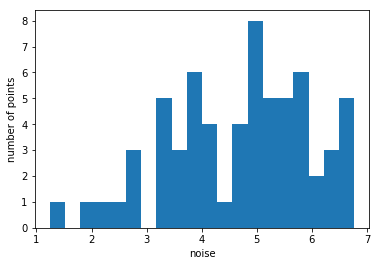

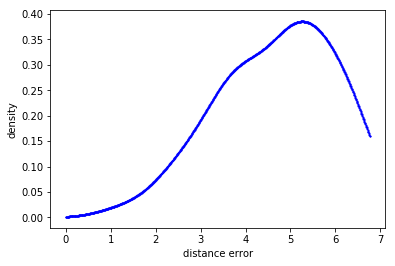

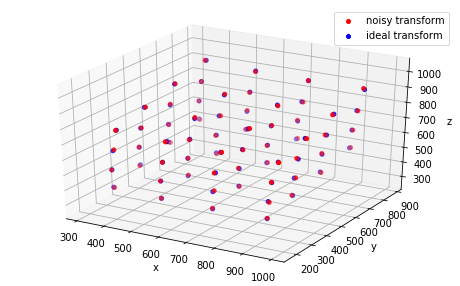

2: prediction points
3: kriging prediction
theta: [0.53697581 0.01842892 0.02795271]
pl: [2. 2. 2.]
theta: [0.00153448 0.01378061 0.00211456]
pl: [2. 2. 2.]
theta: [0.00473951 0.01673031 0.21983868]
pl: [2. 2. 2.]


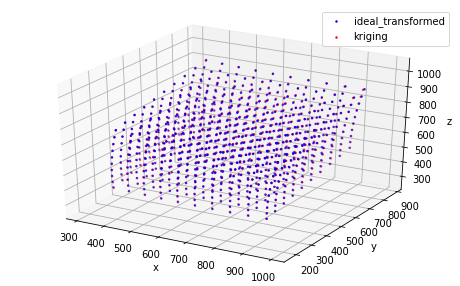

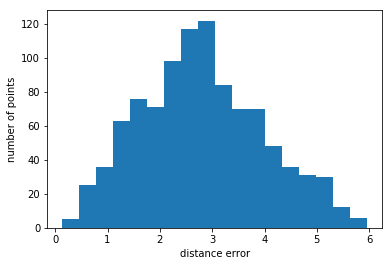

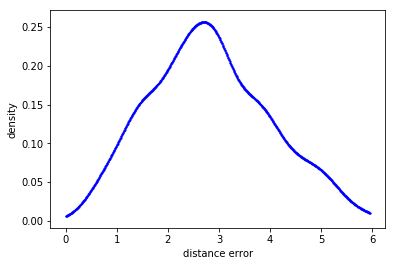

4: done


In [10]:
# for img and holo: 
# [0] is the img/holo space (just 3D mesh), 
# [1] is camera space with noise (simulate what we get in reality)
# [2] is camera space without noise (to evaluate the performance of Kriging)
noise=0.01
number_of_pt=4
points_1=mesh_3d(number_of_pt,calib.img_size1)


######################################
img_init_z=[200,1600,200,1600,200,1600,200,1600]
img_calib=Calib3D(img_init_z,'simulation')
cam_img_noise,cam_img_ideal = generate_points_3d(points_1,show=16,angles=[20,-10],noise_percentage=noise)
# cam_img_noise = img_calib.scan_points(points_1)
img_calib.kriging_3d_build(cam_img_noise,points_1)

holo_init_z=[200,1600,200,1600,200,1600,200,1600]
holo_calib=Calib3D(holo_init_z,'simulation')
cam_holo_noise,cam_holo_ideal = generate_points_3d(points_1,show=16,angles=[-5,10],noise_percentage=noise)
# cam_holo_noise = holo_calib.scan_points(points_1)
holo_calib.kriging_3d_build(cam_holo_noise,points_1)
######################################
## evaluate
number_of_pt=10 # 10**3=1000 points
# [target coords in the camera]
cam_target=mesh_3d(number_of_pt,calib.img_size1)

# [predicted coords in img/holo] that will project (transform) to [target coords in the camera]
img_predict = img_calib.kriging_3d_predict(cam_target)
holo_predict = holo_calib.kriging_3d_predict(cam_target)

# [coords in camera] projected from [predicted coords in img/holo]
cam_from_img_actual = img_calib.scan_points(img_predict)
cam_from_holo_actual = holo_calib.scan_points(holo_predict)

# error of 3 pairs of coords: img-cam, holo-cam, img-holo
# ideally all of them should be low
# if not, check which part(s) have problem
error_cam_img = distance_kde(cam_target, cam_from_img_actual, show=True)
error_cam_holo = distance_kde(cam_target, cam_from_holo_actual, show=True)
error_img_holo = distance_kde(cam_from_img_actual, cam_from_holo_actual, show=True)

# print('1: sampling points')
# print('2: prediction points')
# points_2_pred_noise,points_2_pred_ideal =generate_points_3d(mesh_3d(10,calib.img_size1),show=0,angles=[20,-10],noise_percentage=0)
# print('3: kriging prediction')
# points_2_krig = calib.kriging_3d_predict(points_1,points_2_noise,mesh_3d(10,calib.img_size1),points_2_pred_ideal,show=2)
# print('4: done')

# # print('done')